<a href="https://colab.research.google.com/github/nikhildhavale/pythonLearning/blob/main/PCA_EXPLAINED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

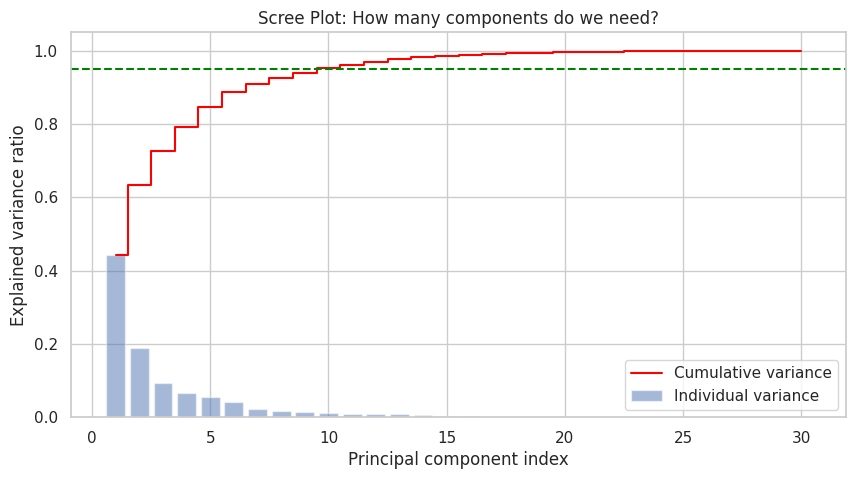

Observation: The first 2 components capture about 63% of the info.
To capture 95% of the information, we would need about 10 components.


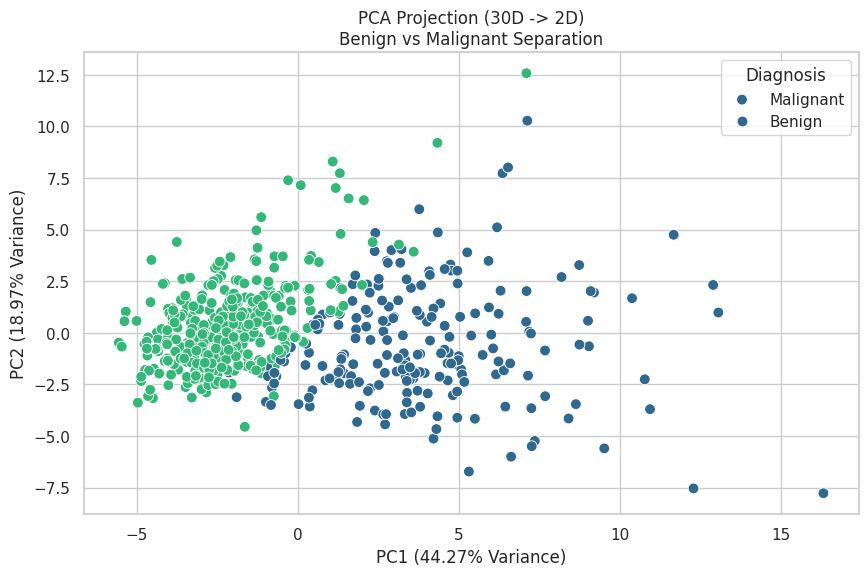


Top 5 Features contributing to PC1 (The 'Size' Component):


,PC1,PC2
mean concave points,0.260854,-0.034768
mean concavity,0.258400,0.060165
worst concave points,0.250886,-0.008257
mean compactness,0.239285,0.151892
worst perimeter,0.236640,-0.199878


In [1]:
# ==========================================
# PCA EXPLAINED: BREAST CANCER DATASET
# ==========================================
# Concepts: Dimensionality Reduction, Variance Ratio, Loading Scores
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. LOAD & SCALE
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

# Standardize (Crucial step in PCA math!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)



# 2. APPLY PCA
# We want to see how many components strictly explain 95% of variance
pca_full = PCA()
pca_full.fit(X_scaled)


# 3. PLOT EXPLAINED VARIANCE (The "Scree Plot")
# This tells students: "How much info is in Component 1 vs Component 2?"
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.bar(range(1, 31), explained_variance, alpha=0.5, align='center', label='Individual variance')
plt.step(range(1, 31), cumulative_variance, where='mid', label='Cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title("Scree Plot: How many components do we need?")
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Threshold')
plt.show()

print("Observation: The first 2 components capture about 63% of the info.")
print("To capture 95% of the information, we would need about 10 components.")

# 4. VISUALIZE 30D -> 2D PROJECTION
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=target, palette='viridis', s=60)
plt.title("PCA Projection (30D -> 2D)\nBenign vs Malignant Separation")
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% Variance)")
plt.legend(title='Diagnosis', labels=['Malignant', 'Benign']) # Fix legend labels
plt.show()

# 5. LOADING SCORES (What makes PC1 "PC1"?)
# This answers: "Which original features matter most?"
loadings = pd.DataFrame(pca_2d.components_.T, columns=['PC1', 'PC2'], index=data.feature_names)
print("\nTop 5 Features contributing to PC1 (The 'Size' Component):")
display(loadings.sort_values('PC1', ascending=False).head(5))